reference: https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

In [1]:
import numpy as np
from numpy.random import rand

In [20]:
class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.loss = None
    def sigmoid(self, z):
        return 1 / (1 + np.e ** (-z))
    def cost_function(self, X, y, weights):
        z = np.dot(X, weights)
        predict_1 = y * np.log(self.sigmoid(z))
        predict_0 = (1 - y) * np.log(1 - self.sigmoid(z))
        return -np.sum(predict_0 + predict_1) / len(X)
    def fit(self, X, y, epochs=25, lr=0.01):
        loss = []
        weights = rand(X.shape[1])
        N = len(X)
        
        for _ in range(epochs):
            z = np.dot(X, weights)
            y_hat = self.sigmoid(z)
            weights -= lr * np.dot(X.T, (y_hat - y)) / N
            
            # saving progress
            loss.append(self.cost_function(X, y, weights))
            
        self.weights = weights
        self.loss = loss
    def predict(self, X):
        z = np.dot(X, self.weights)
        # convert to 0 or 1
        return (self.sigmoid(z) > 0.5).astype(int)

In [5]:
len(np.array(np.arange(4)))

4

In [6]:
import pandas as pd
import numpy as np
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/Users/joydeepbhattacharjee/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/joydeepbhattacharjee/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/joydeepbhattacharjee/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/joydeepbhattacharjee/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/joydeepbhattacharjee/miniconda3/lib/python3.7

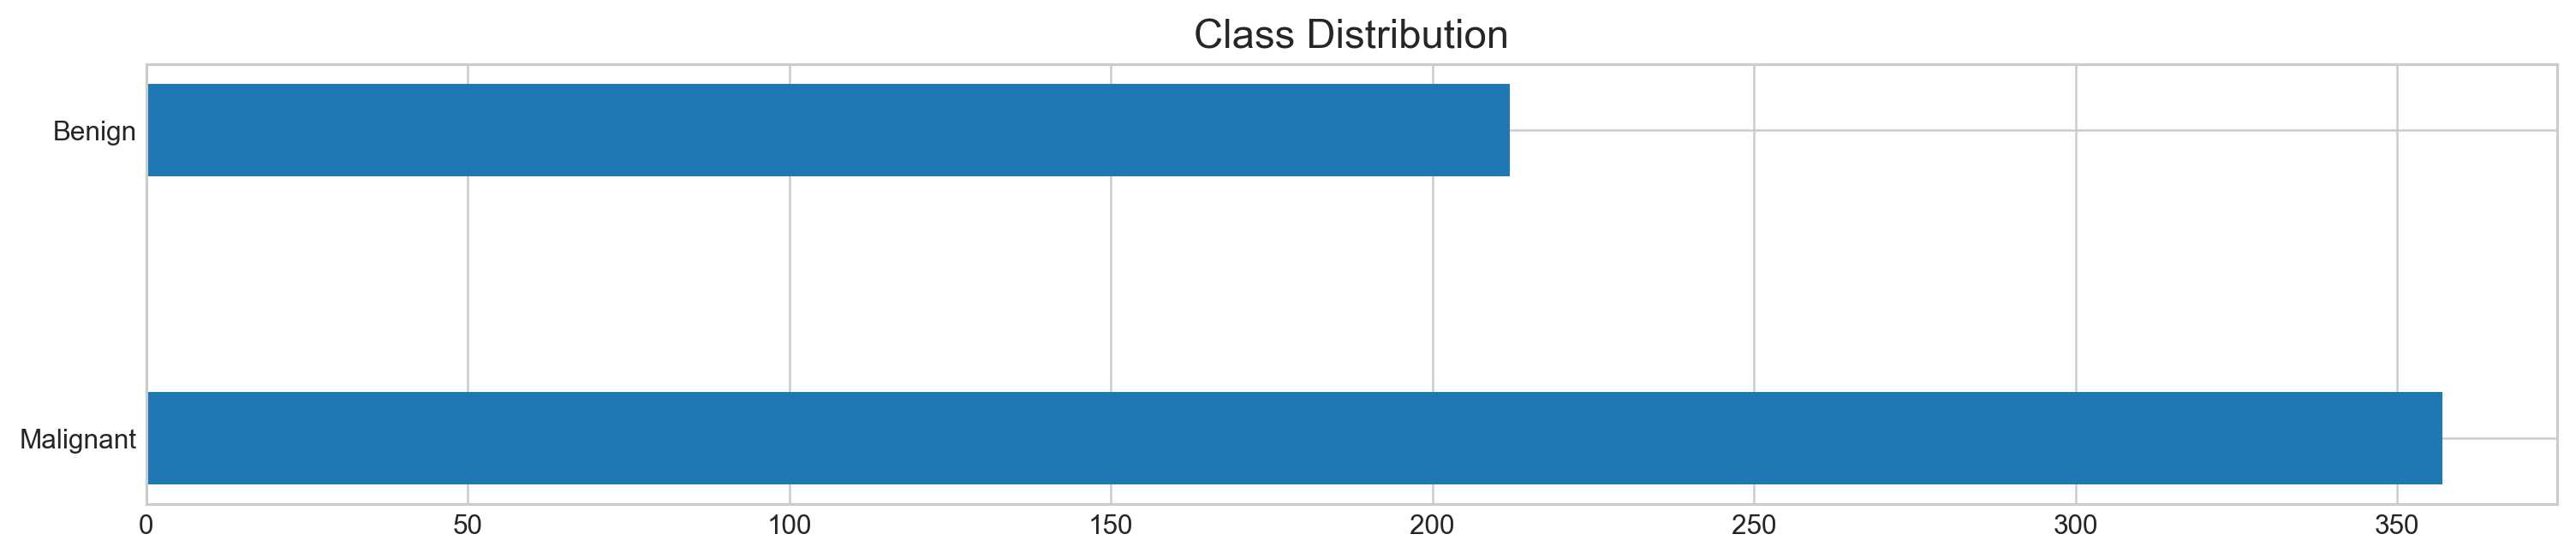

In [7]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names'] 

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution', fontSize=15)
plt.show()

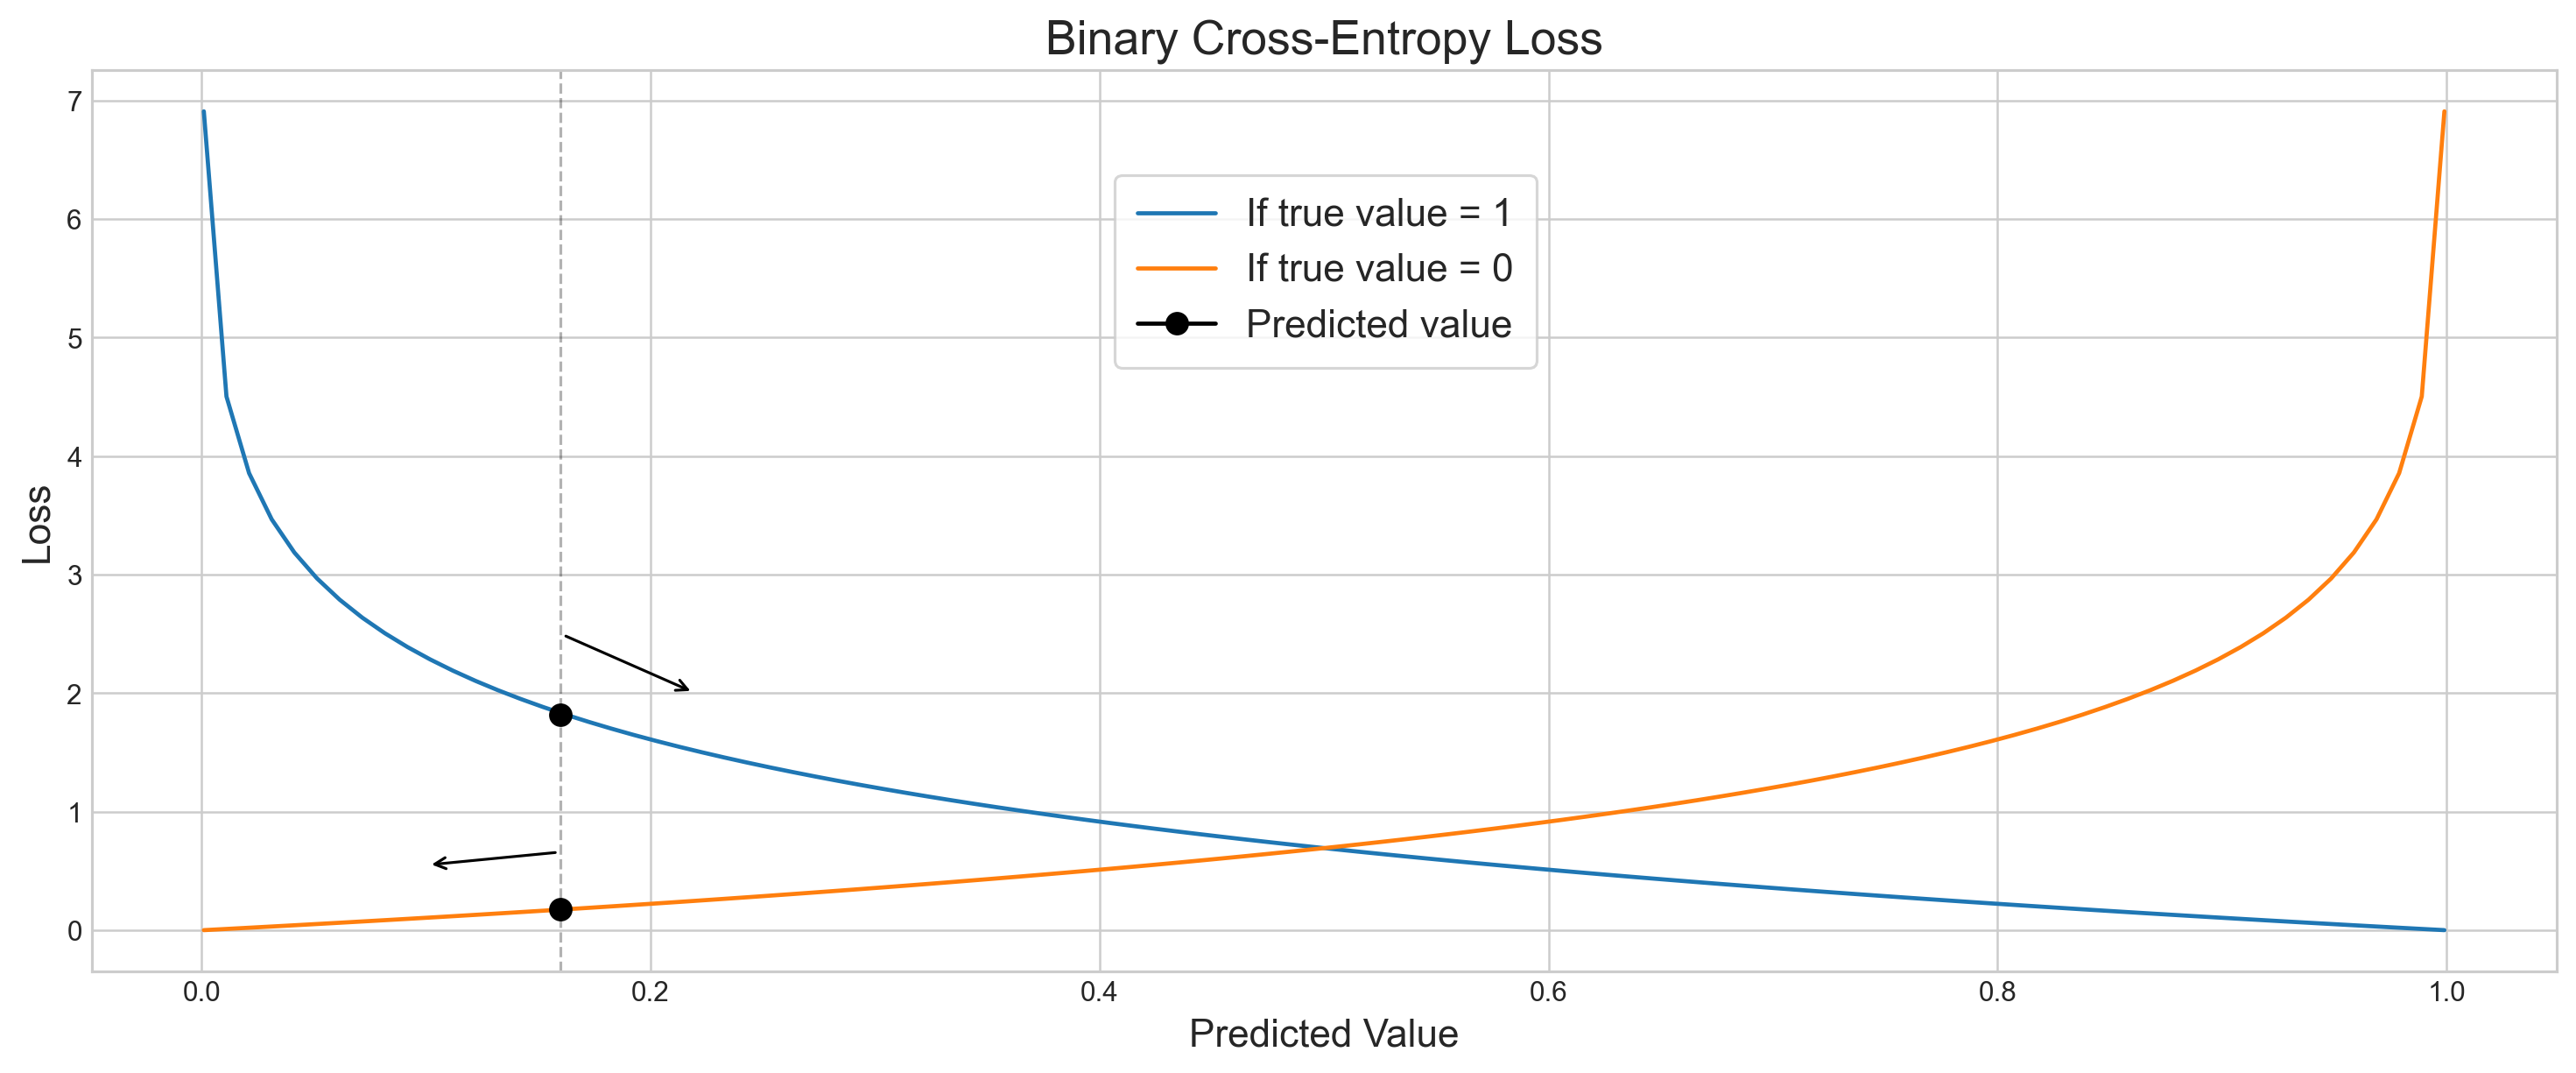

In [8]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss', fontSize=17)
plt.xlabel('Predicted Value', fontSize=14)
plt.ylabel('Loss', fontSize=14)
plt.show()

In [9]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=3000)
y_pred = logreg.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        67
           1       0.90      0.99      0.94       121

    accuracy                           0.93       188
   macro avg       0.94      0.90      0.92       188
weighted avg       0.93      0.93      0.92       188

-------------------------------------------------------
Confusion Matrix

[[ 54  13]
 [  1 120]]


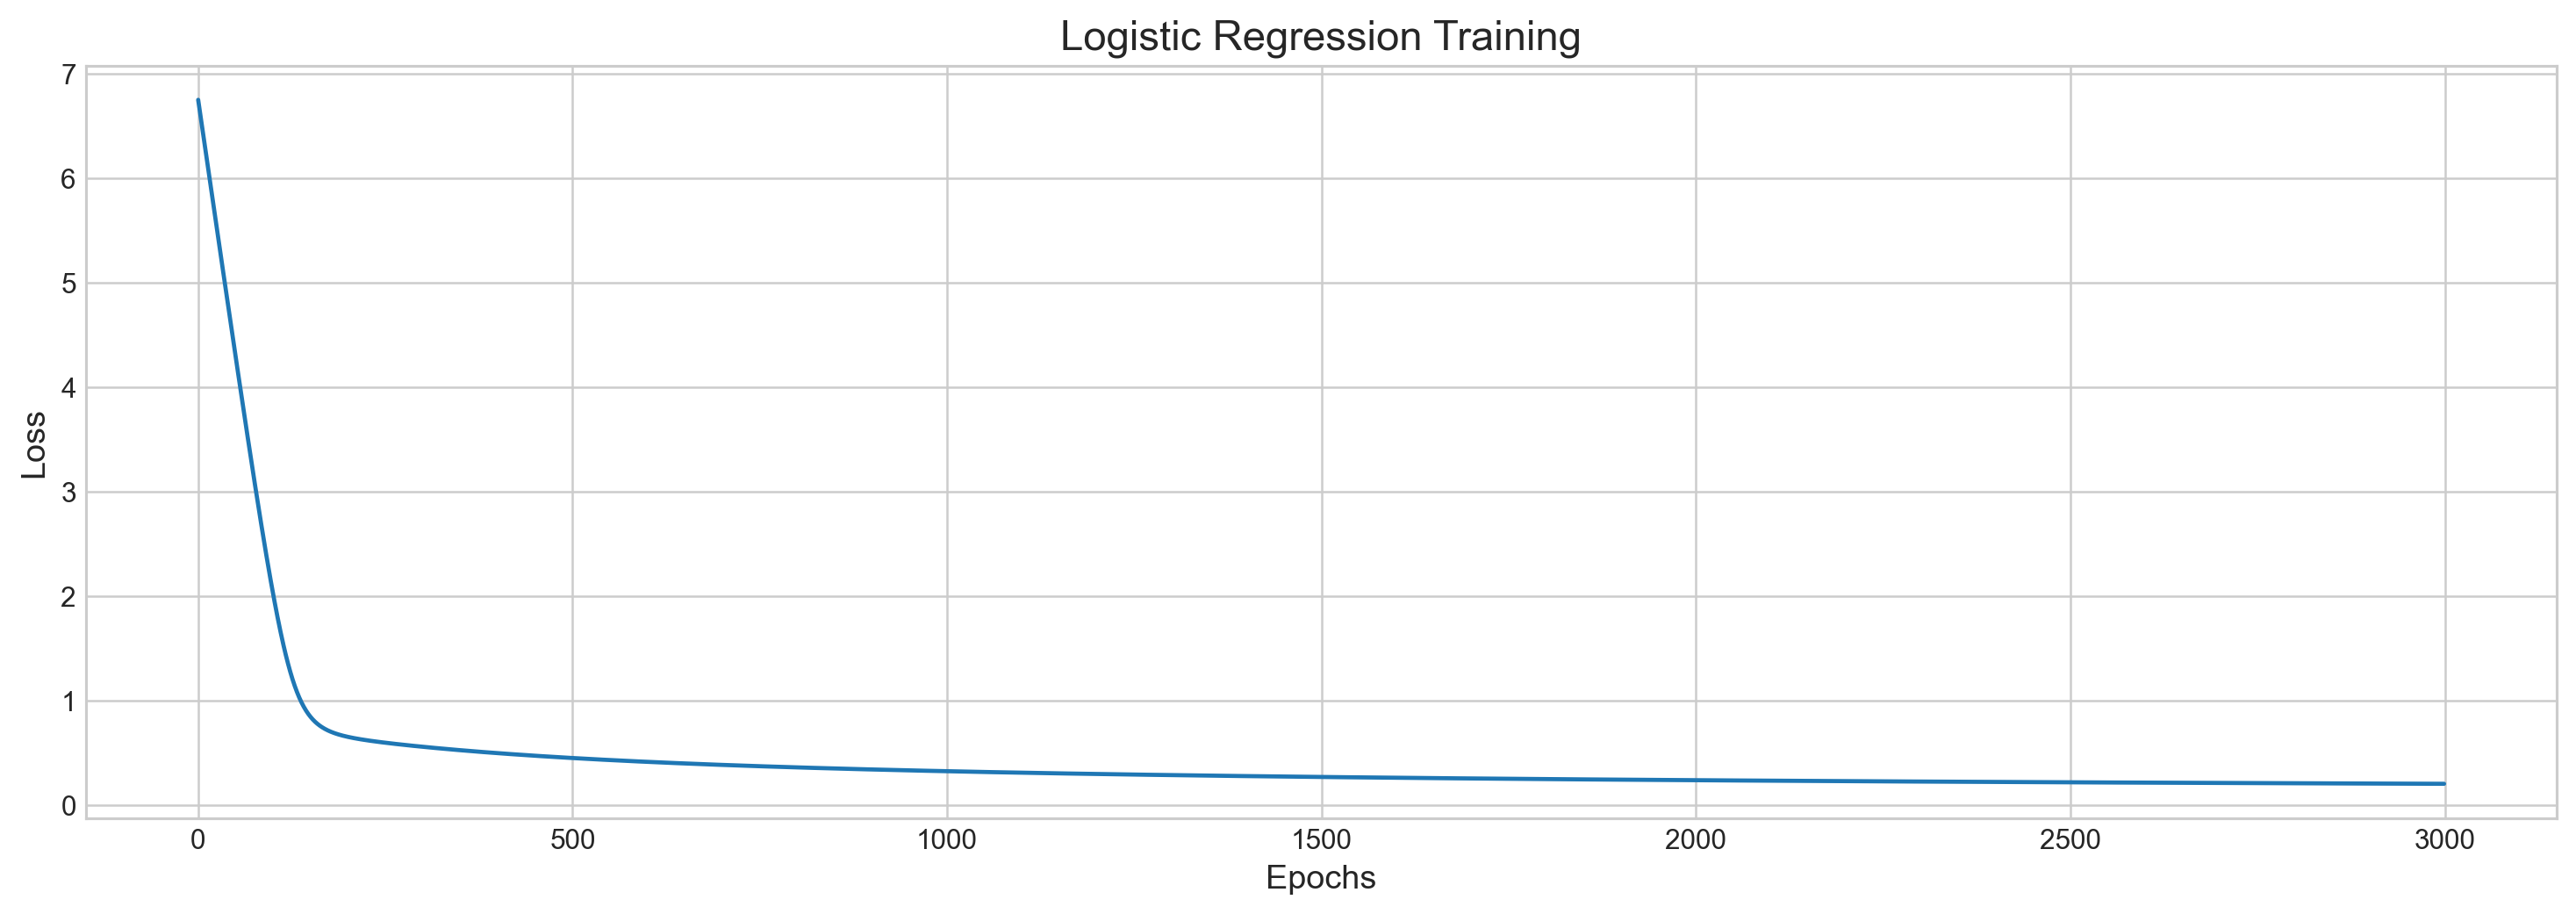

In [34]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,5)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training', fontSize=15)
plt.xlabel('Epochs', fontSize=12)
plt.ylabel('Loss', fontSize=12)
plt.show()

# another notebook

https://www.kaggle.com/jeppbautista/logistic-regression-from-scratch-python

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import time
from sklearn.metrics import confusion_matrix, classification_report

init_notebook_mode(connected=True)   

In [26]:
def log_likelihood(X, y, weights):
    z = np.log(X, weights)
    ll = np.sum(y*z - np.log( 1 + np.e(z)))
    return ll


def gradient_for_ascent(X, y, g_function, weights):
    return np.dot(X.T, (y - g_function(X, weights)))


def update_weight_MLE(weight, learning_rate, gradient):
    return weight + learning_rate * gradient


def sigmoid(X, weights):
    z = np.dot(X, weights)
    return 1 / (1 + np.exp(-z))

In [10]:
data = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [12]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
df = data.copy()

In [14]:
churns = ["Yes", "No"]
fig = {
    'data': [
        {
            'x': df.loc[(df['Churn']==churn), 'MonthlyCharges'] ,
            'y': df.loc[(df['Churn']==churn),'tenure'],
            'name': churn, 'mode': 'markers',
        } for churn in churns
    ],
    'layout': {
        'title': 'Tenure vs Monthly Charges',
        'xaxis': {'title': 'Monthly Charges'},
        'yaxis': {'title': "Tenure"}
    }
}

py.offline.iplot(fig)


In [15]:
figs = []

for churn in churns:
    figs.append(
        go.Box(
            y = df.loc[(df['Churn']==churn),'tenure'],
            name = churn
        )
    )
layout = go.Layout(
    title = "Tenure",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "Tenure"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)

In [16]:
figs = []

for churn in churns:
    figs.append(
        go.Box(
            y = df.loc[(df['Churn']==churn),'MonthlyCharges'],
            name = churn
        )
    )
layout = go.Layout(
    title = "MonthlyCharges",
    xaxis = {"title" : "Churn?"},
    yaxis = {"title" : "MonthlyCharges"},
    width=800,
    height=500
)

fig = go.Figure(data=figs, layout=layout)
py.offline.iplot(fig)


In [17]:
_ = df.groupby('Churn').size().reset_index()
# .sort_values(by='tenure', ascending=True)

data = [go.Bar(
    x = _['Churn'].tolist(),
    y = _[0].tolist(),
    marker=dict(
        color=['rgba(255,190,134,1)', 'rgba(142,186,217,1)'])
)]
layout = go.Layout(
    title = "Churn distribution",
    xaxis = {"title" : "Churn?"},
    width=800,
    height=500
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [35]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
X2 = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [36]:
X.shape

(7043, 2)

In [37]:
np.random.rand(X.shape[1])

array([0.95772676, 0.37313163])

In [38]:
gradient_for_ascent

<function __main__.gradient_for_ascent(X, y, g_function, weights)>

In [39]:
update_weight_MLE

<function __main__.update_weight_MLE(weight, learning_rate, gradient)>

In [40]:
np.random.rand(X.shape[1])

array([0.00619221, 0.52944968])

In [41]:
start_time = time.time()

num_iter = 10000
learning_rate = 0.001

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
theta = np.random.rand(X.shape[1])

for _ in range(num_iter):
    gradient = gradient_for_ascent(X, y, sigmoid, theta)
    theta = update_weight_MLE(theta, learning_rate, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(learning_rate, num_iter))

/Users/joydeepbhattacharjee/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in exp



Training time (Log Reg using Gradient descent):2.4755301475524902 seconds
Learning rate: 0.001
Iteration: 10000


In [46]:
theta.shape, X2.shape, X.shape

((3,), (7043, 2), (7043, 3))

In [48]:
result = sigmoid(X, theta)
result = (result > 0.5).astype(int)

/Users/joydeepbhattacharjee/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning:

overflow encountered in exp



In [49]:
print(classification_report(y, result))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y, result))

              precision    recall  f1-score   support

           0       0.95      0.36      0.53      5174
           1       0.35      0.95      0.51      1869

    accuracy                           0.52      7043
   macro avg       0.65      0.66      0.52      7043
weighted avg       0.79      0.52      0.52      7043

-------------------------------------------------------
Confusion Matrix

[[1884 3290]
 [  90 1779]]


In [50]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['class']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


52.009087036774105

In [53]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

clf = LogisticRegression(fit_intercept=True, max_iter=100000)
clf.fit(df[['tenure','MonthlyCharges']], y)
print("Training time (sklearn's LogisticRegression module):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (sklearn's LogisticRegression module):0.02400994300842285 seconds
Learning rate: 0.1
Iteration: 10000


In [54]:
result3 = clf.predict(df[['tenure','MonthlyCharges']])

In [55]:
print(classification_report(y, result3))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y, result3))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      5174
           1       0.63      0.44      0.52      1869

    accuracy                           0.78      7043
   macro avg       0.73      0.68      0.69      7043
weighted avg       0.77      0.78      0.77      7043

-------------------------------------------------------
Confusion Matrix

[[4697  477]
 [1041  828]]
